<a href="https://colab.research.google.com/github/keith-keyah/Group_2_project/blob/main/Group_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objectives
* Yield per region
* Crop Type grown per region
* Yield of the different crops per region
* Correlation between population size and yield

In [36]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Loading the district_crop_yield DataSet
district_crop_yield = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
district_crop_yield.head()


,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [38]:
# summary information for the district_crop_yield DataSet
district_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 748.0+ bytes


In [39]:
# Checking for null values
district_crop_yield.isna().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [40]:
district_crop_yield.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [41]:
district_crop_yield['NAME'].unique()

array(['ABIM', 'AMUDAT', 'KAABONG', 'KOTIDO', 'MOROTO', 'NAKAPIRIPIRIT',
       'NAPAK'], dtype=object)

In [42]:
subcounty_crop_yield = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
subcounty_crop_yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [43]:
subcounty_crop_yield['DISTRICT_NAME'].unique()

array(['KOTIDO', 'KAABONG', 'ABIM', 'AMUDAT', 'MOROTO', 'NAKAPIRIPIRIT',
       'NAPAK'], dtype=object)

In [44]:
# summary information for the data set
subcounty_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [45]:
# Checking for null values
subcounty_crop_yield.isna().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


In [46]:
# Renaming the district columns under a common name to enable data blending
district_crop_yield = district_crop_yield.rename(columns={'NAME':'DISTRICT_NAME'})
print(district_crop_yield)

   OBJECTID  DISTRICT_NAME     POP        Area  S_Yield_Ha  M_Yield_Ha  \
0        92           ABIM   90385  2771977106         449        1040   
1        96         AMUDAT  101790  1643582836         205        1297   
2        20        KAABONG  627057  7373606003         279         945   
3        85         KOTIDO  243157  3641539808         331        1148   
4         5         MOROTO  127811  3570160948         128         355   
5        54  NAKAPIRIPIRIT  146780  4216323900         356        1264   
6        80          NAPAK  167625  4508782023         137         854   

   Crop_Area_Ha     S_Area_Ha    M_Area_Ha  S_Prod_Tot  M_Prod_Tot  
0   5470.068394   3277.295971  1848.621855     1471506     1922567  
1   5765.443719   2973.423860  2733.661014      609552     3545558  
2  28121.672530  20544.194960  7394.416334     5731830     6987723  
3  53032.649450  50247.443900  1751.372284    16631904     2010575  
4   5954.814048   4741.748776  1190.050606      606944      42

In [47]:
district_crop_yield.to_csv('District_crop_yield.csv')

In [48]:
# average sorghum yield per district
mean_S_Yield_dist = district_crop_yield['S_Yield_Ha'].mean()
mean_S_Yield_dist

np.float64(269.2857142857143)

In [49]:
#average maize yield per district
mean_M_Yield_dist = district_crop_yield['M_Yield_Ha'].mean()
mean_M_Yield_dist

np.float64(986.1428571428571)

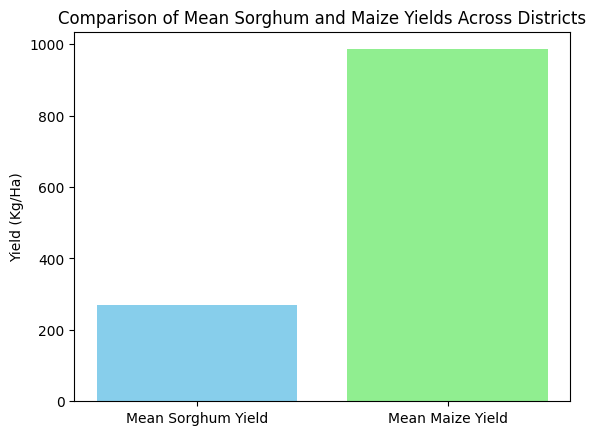

In [50]:
# Create a bar chart to compare mean maize and sorghum yields for district yield
labels = ['Mean Sorghum Yield', 'Mean Maize Yield']
means = [mean_S_Yield_dist, mean_M_Yield_dist]

plt.bar(labels, means, color=['skyblue', 'lightgreen'])
plt.ylabel('Yield (Kg/Ha)')
plt.title('Comparison of Mean Sorghum and Maize Yields Across Districts')
plt.show()

# **QUESTION**:DOES *A HIGHER POPULATION LEAD TO A HIGHER CROP YIELD IN AN AREA*
the below strings of code help us find the solution to this question.

We are going to work on comparing the mean total district yields to the mean total population in order to come up with a sound conclusion.






In [51]:
#mean district population
mean_dist_population = district_crop_yield['POP'].mean()
mean_dist_population

np.float64(214943.57142857142)

In [52]:
#mean total crop yields
district_crop_yield['total_yields'] = district_crop_yield['S_Yield_Ha'] + district_crop_yield['M_Yield_Ha']
district_crop_yield['total_yields'].mean()

np.float64(1255.4285714285713)

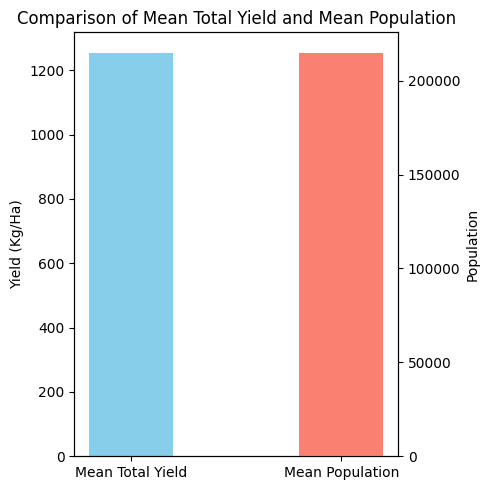

In [56]:
#bar graph comparing the mean total yield against the mean population
fig, ax1 = plt.subplots(figsize=(5, 5))

labels = ['Mean Total Yield', 'Mean Population']
means_yield = [district_crop_yield['total_yields'].mean()]
means_pop = [mean_dist_population]


# Bar chart for mean total yield on the left y-axis
rects1 = ax1.bar(labels[0], means_yield, color='skyblue', width=0.4)
ax1.set_ylabel('Yield (Kg/Ha)')
ax1.set_title('Comparison of Mean Total Yield and Mean Population')
ax1.tick_params(axis='y')


# Create a second y-axis for mean population
ax2 = ax1.twinx()
rects2 = ax2.bar(labels[1], means_pop, color='salmon', width=0.4)
ax2.set_ylabel('Population')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

## **CONCLUSION**
A higher population concentration in an area subsequently leads to a higher count of crop yields in said area .







# HOW DOES THE AMOUNT OF LAND ALLOCATED TO CROP GROWTH IMPACT INTEGRAL QUANTITY OF CROP YIELDS
Here we will come up with three visualisations comparing:


* maize yields against maize area per hectares
* sougham yields against sougham area per hectares
* total yields against total crop area per hectares






In [58]:
#mean of sougham area per hectare district-wise
mean_sougham_area= district_crop_yield['S_Area_Ha'].mean()
mean_sougham_area

np.float64(16737.636651)

In [57]:
#mean of maize area per hectare district-wise
mean_maizearea = district_crop_yield['M_Area_Ha'].mean()
mean_maizearea

np.float64(3983.9470818571426)

In [ ]:
district_crop_yield['total_crop_area']=